# Import CSV

In [39]:
import pandas as pd
df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')
print(df)

                                                  Title  \
0     Your anger may be caused by a magnesium defici...   
1     Do you ever get so angry that you wish to kill...   
2     Does anyone else just avoid people because you...   
3     Was anyone else “not allowed” to get upset gro...   
4     I wish people understood that outbursts don't ...   
...                                                 ...   
9073  Fastest way I’ve found to get a panic attack u...   
9074                                 Looking for advice   
9075                        New panic attack experience   
9076  I’m having pretty bad suicidal thoughts, think...   
9077      Anxiety symptoms replicating low blood sugar?   

                                                   Text  Score  Topic  \
0     I tried absolutely everything to fix my chroni...    743  anger   
1     I don't know if it's my anger issues talking o...    692  anger   
2     Lately I’ve been noticing that I take the extr...    489  anger   

In [40]:
#Retokenize
import nltk
nltk.download('punkt_tab')

lda1_df = df.copy()

lda1_df['Title_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['Title_pro']), axis=1)
lda1_df['Text_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['Text_pro']), axis=1)
lda1_df['T_T_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['T_T_pro']), axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
print(lda1_df['T_T_pro'])

0       [anger, may, caused, magnesium, deficiency, ne...
1       [ever, get, angry, wish, kill, moment, dont, k...
2       [anyone, else, avoid, people, know, theyll, ma...
3       [anyone, else, allowed, get, upset, growing, a...
4       [wish, people, understood, outburst, dont, hap...
                              ...                        
9073    [fastest, way, ive, found, get, panic, attack,...
9074    [looking, advice, hi, im, f, ive, professional...
9075    [new, panic, attack, experience, hi, guy, want...
9076    [im, pretty, bad, suicidal, thought, thinking,...
9077    [anxiety, symptom, replicating, low, blood, su...
Name: T_T_pro, Length: 9078, dtype: object


# LDA: Title vs Text vs Both vs Both-Common

In [42]:
!pip install pandas gensim spacy nltk matplotlib

In [43]:
#Create Dictionary and Corpus from T_T
import gensim
import gensim.corpora as corpora

In [44]:
id2word = corpora.Dictionary(lda1_df['T_T_pro'])
texts = lda1_df['T_T_pro']
corpus = [id2word.doc2bow(text) for text in texts]

In [45]:
#Build LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [46]:
#Print Topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.042*"im" + 0.032*"like" + 0.029*"feel" + 0.016*"get" + 0.016*"dont" + 0.014*"know" + 0.012*"feeling" + 0.011*"even" + 0.011*"anyone" + 0.010*"thing"')
(1, '0.200*"panic" + 0.158*"attack" + 0.039*"heart" + 0.028*"symptom" + 0.020*"anxiety" + 0.013*"chest" + 0.012*"medication" + 0.010*"blood" + 0.009*"er" + 0.008*"experience"')
(2, '0.068*"eating" + 0.055*"eat" + 0.046*"food" + 0.044*"weight" + 0.017*"water" + 0.016*"drink" + 0.014*"calorie" + 0.014*"body" + 0.012*"meal" + 0.011*"hot"')
(3, '0.026*"day" + 0.022*"anxiety" + 0.021*"ive" + 0.021*"year" + 0.020*"time" + 0.012*"month" + 0.011*"work" + 0.011*"first" + 0.010*"started" + 0.010*"last"')
(4, '0.019*"told" + 0.017*"went" + 0.016*"said" + 0.016*"didnt" + 0.013*"would" + 0.013*"got" + 0.013*"felt" + 0.012*"couldnt" + 0.012*"home" + 0.011*"came"')
(5, '0.060*"disorder" + 0.015*"help" + 0.013*"people" + 0.012*"post" + 0.011*"recovery" + 0.010*"ed" + 0.010*"mental" + 0.009*"request" + 0.009*"health" + 0.008*"u"')


In [47]:
#Compute U Mass Score and CV Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
u_massPlain = coherence_model_lda.get_coherence()
print('U Mass Score: ', u_massPlain)

coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
c_vPlain = coherence_model_lda.get_coherence()
print('CV Coherence Score: ', c_vPlain)

U Mass Score:  -2.1177723181263572
CV Coherence Score:  0.44936476085361327


What just happened?

LDA has found 6 topics with those 10 words being the most associated with them.

A U Mass score is a metric created by the University of Massachusetts. It it based on how oftern word pairs appear within a topic and the closer it is to 0, the better.

A CV Coherence score is a popular metric that measures the relative distance between words within a topic. .55 is the start of a "good" score with .8 being where it starts being "too good." It is not as reliable as U Mass, even stated by the creator.


In [48]:
#Title Only
id2word = corpora.Dictionary(lda1_df['Title_pro'])
texts = lda1_df['Title_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Title_pro'], dictionary=id2word, coherence='u_mass')
u_massTitle = coherence_model_lda.get_coherence()
print('\nU Mass Score: ', u_massTitle)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Title_pro'], dictionary=id2word, coherence='c_v')
c_vTitle = coherence_model_lda.get_coherence()
print('\nCV Coherence Score: ', c_vTitle)

(0, '0.034*"today" + 0.021*"month" + 0.020*"dying" + 0.019*"week" + 0.019*"story" + 0.016*"trigger" + 0.015*"med" + 0.015*"guy" + 0.013*"living" + 0.013*"night"')
(1, '0.043*"feeling" + 0.038*"day" + 0.034*"cant" + 0.027*"fear" + 0.023*"stop" + 0.022*"really" + 0.022*"body" + 0.021*"youre" + 0.020*"even" + 0.019*"advice"')
(2, '0.086*"anyone" + 0.054*"get" + 0.053*"request" + 0.052*"feel" + 0.051*"else" + 0.045*"like" + 0.025*"eating" + 0.018*"time" + 0.018*"first" + 0.018*"better"')
(3, '0.264*"panic" + 0.202*"attack" + 0.018*"heart" + 0.018*"year" + 0.011*"work" + 0.010*"ive" + 0.009*"know" + 0.009*"go" + 0.008*"way" + 0.007*"finally"')
(4, '0.101*"anxiety" + 0.035*"going" + 0.033*"life" + 0.030*"ever" + 0.027*"experience" + 0.013*"live" + 0.013*"hate" + 0.013*"could" + 0.013*"worse" + 0.012*"weird"')
(5, '0.084*"im" + 0.079*"disorder" + 0.036*"help" + 0.024*"symptom" + 0.024*"need" + 0.023*"people" + 0.022*"dont" + 0.017*"someone" + 0.017*"ed" + 0.016*"please"')

U Mass Score:  -10.

In [49]:
#Text Only
id2word = corpora.Dictionary(lda1_df['Text_pro'])
texts = lda1_df['Text_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Text_pro'], dictionary=id2word, coherence='u_mass')
u_massText = coherence_model_lda.get_coherence()
print('\nU Mass Score: ', u_massText)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Text_pro'], dictionary=id2word, coherence='c_v')
c_vText = coherence_model_lda.get_coherence()
print('\nCV Coherence Score: ', c_vText)

(0, '0.030*"im" + 0.022*"like" + 0.021*"panic" + 0.020*"feel" + 0.014*"attack" + 0.014*"ive" + 0.013*"get" + 0.012*"anxiety" + 0.011*"dont" + 0.010*"know"')
(1, '0.033*"na" + 0.025*"fucking" + 0.024*"gon" + 0.023*"panicking" + 0.022*"mom" + 0.018*"shes" + 0.014*"fuck" + 0.013*"kid" + 0.012*"sister" + 0.011*"he"')
(2, '0.057*"symptom" + 0.020*"health" + 0.019*"body" + 0.019*"rate" + 0.017*"physical" + 0.016*"sensation" + 0.013*"recovery" + 0.011*"ed" + 0.010*"brain" + 0.009*"blood"')
(3, '0.074*"disorder" + 0.019*"people" + 0.011*"post" + 0.010*"u" + 0.010*"book" + 0.009*"exposure" + 0.008*"experience" + 0.007*"cbt" + 0.007*"treatment" + 0.007*"others"')
(4, '0.022*"member" + 0.015*"taste" + 0.011*"bodily" + 0.011*"signal" + 0.011*"w" + 0.010*"science" + 0.009*"inner" + 0.009*"feed" + 0.008*"ridiculous" + 0.008*"protein"')
(5, '0.037*"attack" + 0.037*"panic" + 0.019*"year" + 0.016*"felt" + 0.015*"started" + 0.015*"day" + 0.014*"month" + 0.014*"got" + 0.012*"last" + 0.012*"week"')

U Mas

Text(0.5, 1.0, 'UMass Scores of Plain Models using Different Parts of Text in Decimal')

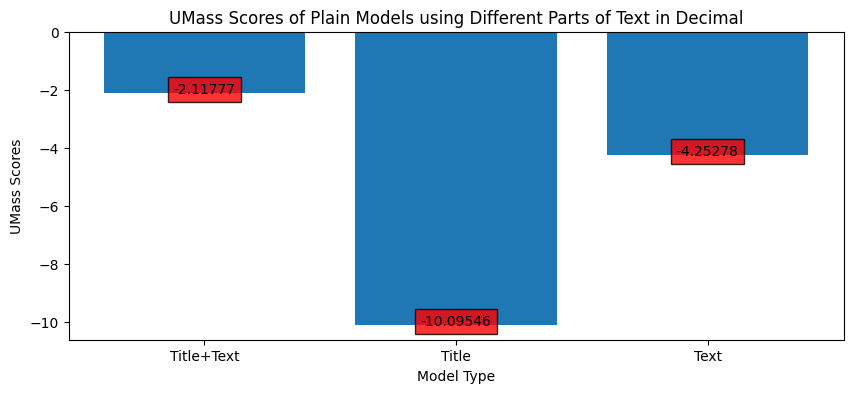

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center',
                 bbox = dict(facecolor = 'red', alpha =.8))

labels = ["Title+Text", "Title", "Text"]
scores_UM = [u_massPlain, u_massTitle, u_massText]
scores_UM = [round(num, 5) for num in scores_UM]

plt.figure(figsize=(10,4))
plt.bar(labels, scores_UM)
addlabels(labels, scores_UM)
plt.xlabel('Model Type')
plt.ylabel('UMass Scores')
plt.title('UMass Scores of Plain Models using Different Parts of Text in Decimal')

Individually, the coherence scores of Title (-10.1) and Text (-4.3) are further from 0 than combined Title and Text (-2.1).

Text(0.5, 1.0, 'CV Coherence Scores of Plain Models using Different Parts of Text in Decimal')

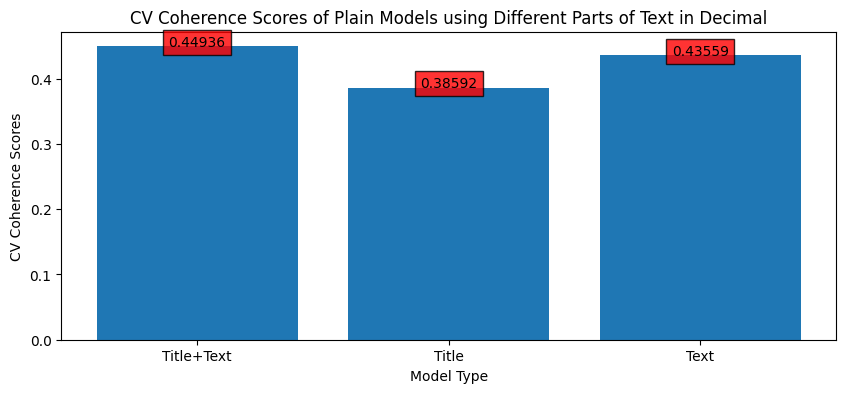

In [51]:
scores_CV = [c_vPlain, c_vTitle, c_vText]
scores_CV = [round(num, 5) for num in scores_CV]

plt.figure(figsize=(10,4))
plt.bar(labels, scores_CV)
addlabels(labels, scores_CV)
plt.xlabel('Model Type')
plt.ylabel('CV Coherence Scores')
plt.title('CV Coherence Scores of Plain Models using Different Parts of Text in Decimal')

Title+Text once again has the best score with CV Coherence

In [52]:
#Remove most common words
lda2_df = df.copy()
print(lda2_df['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment dont know ange...
2       anyone else avoid people know theyll make angr...
3       anyone else allowed get upset growing always s...
4       wish people understood outburst dont happen sm...
                              ...                        
9073    fastest way ive found get panic attack control...
9074    looking advice hi im f ive professionally diag...
9075    new panic attack experience hi guy wanted see ...
9076    im pretty bad suicidal thought thinking cant h...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [53]:
#common words found with EDA
common = ['im', 'like', 'feel', 'dont', 'get' 'time', 'know', 'ive', 'people',
          'day', 'want', 'thing', 'even', 'one', 'life', 'year', 'really', 'make']
for word in common:
  lda2_df['T_T_pro'] = lda2_df['T_T_pro'].str.replace(word, '', regex=False)

print(lda2_df['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment   anger issue ...
2       any else avoid   theyll  angry lately  noticin...
3       any else allowed get upset growing always scol...
4       wish  understood outburst  happen small issue ...
                              ...                        
9073    fastest way  found get panic attack control us...
9074    looking advice hi  f  professionally diagnosed...
9075    new panic attack experience hi guy ed see any ...
9076     pretty bad suicidal thought thinking cant han...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [54]:
#Tokenize
lda2_df['T_T_pro'] = lda2_df.apply(lambda row: nltk.word_tokenize(row['T_T_pro']), axis=1)

#LDA
id2word = corpora.Dictionary(lda2_df['T_T_pro'])
texts = lda2_df['T_T_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda2_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
u_massCom = coherence_model_lda.get_coherence()
print('\nUMass Score: ', u_massCom)

coherence_model_lda = CoherenceModel(model=lda_model, texts=lda2_df['T_T_pro'], dictionary=id2word, coherence='c_v')
c_vCom = coherence_model_lda.get_coherence()
print('\nCV Coherence Score: ', c_vCom)

(0, '0.043*"disorder" + 0.030*"symptom" + 0.019*"youre" + 0.012*"experience" + 0.011*"weight" + 0.009*"post" + 0.008*"help" + 0.008*"recovery" + 0.007*"many" + 0.007*"healthy"')
(1, '0.060*"eat" + 0.053*"eating" + 0.050*"food" + 0.028*"hate" + 0.026*"na" + 0.019*"fucking" + 0.019*"gon" + 0.013*"meal" + 0.013*"store" + 0.011*"fuck"')
(2, '0.021*"cbt" + 0.018*"diet" + 0.015*"sugar" + 0.015*"recover" + 0.014*"fat" + 0.014*"emergency" + 0.011*"success" + 0.010*"recovering" + 0.009*"research" + 0.009*"scan"')
(3, '0.054*"xanax" + 0.034*"doom" + 0.027*"klonopin" + 0.017*"curious" + 0.014*"recognize" + 0.012*"recommend" + 0.011*"monitor" + 0.010*"happiness" + 0.009*"training" + 0.009*"snack"')
(4, '0.036*"panic" + 0.029*"attack" + 0.013*"get" + 0.012*"anxiety" + 0.012*"te" + 0.010*"every" + 0.009*"ing" + 0.008*"going" + 0.008*"go" + 0.008*"heart"')
(5, '0.063*"body" + 0.056*"any" + 0.055*"else" + 0.018*"sensation" + 0.017*"normal" + 0.013*"weird" + 0.012*"fast" + 0.011*"racing" + 0.010*"stoma

Since -4.3 < -2.1, we will remain without removing common words.

# LDA: Parameter Optimization

By tuning the passes (Number of passes through the corpus during training) and chunk size (Number of documents to be used in each training chunk), we can try to optimize LDA.

In [55]:
k = [15, 20, 25, 30, 35]
u_m = []
c_v = []

for p in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=6,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=p,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
  u_m.append(coherence_model_lda.get_coherence())
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())


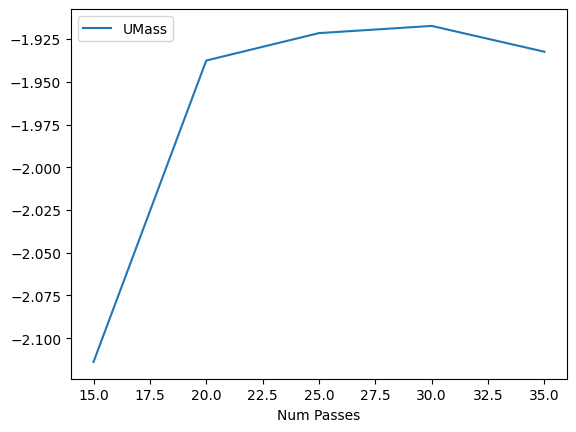

15 :  -2.1138693309467005
20 :  -1.937533024842142
25 :  -1.9214892962411099
30 :  -1.9172828620370426
35 :  -1.9323829064159839


In [56]:
plt.plot(k, u_m, label="UMass")
plt.xlabel("Num Passes")
plt.legend()
plt.show()
for x in range(5):
  print(k[x],": ", u_m[x])

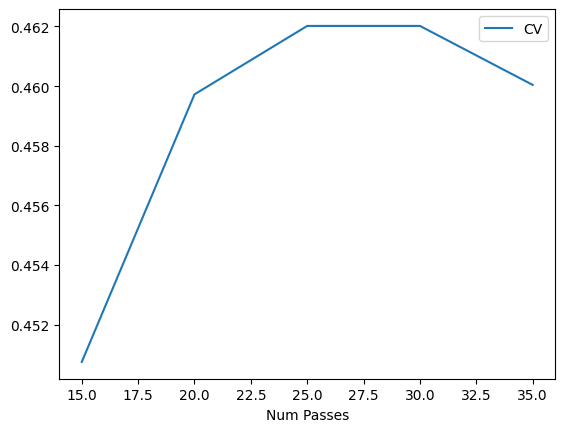

15 :  0.4507512172919375
20 :  0.4597245295076369
25 :  0.4620190385079408
30 :  0.4620190385079408
35 :  0.460041560550587


In [57]:
plt.plot(k, c_v, label="CV")
plt.xlabel("Num Passes")
plt.legend()
plt.show()
for x in range(5):
  print(k[x],": ", c_v[x])

It peaks at 30 passes.

In [ ]:
k = [90, 95, 100, 105, 110]
u_m = []
c_v = []

for c in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=6,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=c,
                                              passes=30,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
  u_m.append(coherence_model_lda.get_coherence())
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

In [ ]:
plt.plot(k, u_m)
plt.xlabel("Num Chunk Size")
plt.ylabel("UMass score")
plt.show()
for x in range(5):
  print(k[x],": ", u_m[x])

In [ ]:
plt.plot(k, c_v)
plt.xlabel("Num Chunk Size")
plt.ylabel("CV Coherence score")
plt.show()
for x in range(5):
  print(k[x],": ", c_v[x])

Chunk size 100 also seems ideal.

In [ ]:
#Optimized Model
#No common words removed, 6 topics, 100 chunk size, and 30 passes
id2word = corpora.Dictionary(lda1_df['T_T_pro'])
texts = lda1_df['T_T_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=30,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
u_massOpt = coherence_model_lda.get_coherence()
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
c_vOpt = coherence_model_lda.get_coherence()

# Visualization

In [ ]:
labels = ["Plain", "No Common", "Optimize"]
all_u_m = [u_massPlain, u_massCom, u_massOpt]
all_u_m = [round(num, 5) for num in all_u_m]

plt.figure(figsize=(7,4))
plt.bar(labels, all_u_m)
addlabels(labels, all_u_m)
plt.xlabel('Model Types')
plt.ylabel('UMass Scores')
plt.title('UMass Score of the Models in Decimal')

In [ ]:
all_c_v = [c_vPlain, c_vCom, c_vOpt]
all_c_v = [round(num, 5) for num in all_c_v]

plt.figure(figsize=(7,4))
plt.bar(labels, all_c_v)
addlabels(labels, all_c_v)
plt.xlabel('Model Types')
plt.ylabel('CV Coherence Score')
plt.title('CV Coherence Scores of the Models in Decimal')